# Customer Churn Prediction in the Telecommunications Industry Using Machine Learning

## Problem Statement

In the telecommunications industry, retaining existing customers is a major challenge due to high competition and the ease with which customers can switch service providers. Customer churn — when customers stop using a company’s services — leads to significant revenue loss and increased costs associated with acquiring new customers.

Telecom companies collect large amounts of customer data, including usage patterns, service subscriptions, and billing information. This data can be analyzed using machine learning techniques to identify patterns that indicate whether a customer is likely to churn.

The problem addressed in this project is to build a machine learning model that predicts customer churn based on available telecom customer data. By accurately identifying customers who are at risk of leaving, the company can take proactive measures such as targeted promotions or improved services to reduce churn and improve customer retention.

## Objectives

## Data Description

## Explaratory Data analysis

### Data Loading

In [197]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


### Data Understanding

In [198]:
df = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [200]:
df.shape

(3333, 21)

In [201]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [202]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [203]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [204]:
df['churn'].value_counts(normalize= True) * 100

False    85.508551
True     14.491449
Name: churn, dtype: float64

In [205]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [206]:
df['area code'] = df['area code'].astype(object)


In [207]:
df.drop(columns= 'phone number', inplace= True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [209]:
# did customer service made calls impact whether someone dropped the service
# international plan

In [210]:
# find the correlation between numerical columns 

### Model preprocessing

In [211]:
X = df.drop(columns= 'churn')
y = df['churn'].astype(int)

In [212]:
binary_cols = ['international plan', 'voice mail plan']
multi_cols = ['state', 'area code']

In [213]:
binary_cols, multi_cols

(['international plan', 'voice mail plan'], ['state', 'area code'])

In [214]:
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])



In [215]:
ohe = OneHotEncoder(sparse= False, drop='first')
multi_encoded = ohe.fit_transform(X[multi_cols])

multi_col_names = ohe.get_feature_names(multi_cols)
multi_encoded_df = pd.DataFrame(multi_encoded, columns=multi_col_names, index=X.index)
multi_encoded_df



,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [216]:
X = X.drop(columns= multi_cols)
X = pd.concat([X, multi_encoded_df], axis= 1)

### Model Training

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [218]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

In [219]:
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [220]:
y_pred = model.predict(X_test_scaled)

In [221]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision) # Of the customers we flagged as churners, how many actually churned? Low precision = annoying customers with retention offers they didn’t need.
print("Recall:", recall)   # most important - Of all customers who actually churned, how many did we catch? High recall = fewer churners slipping through the cracks.
print("F1:", f1)


Accuracy: 0.7466266866566716
Precision: 0.3269230769230769
Recall: 0.7010309278350515
F1: 0.4459016393442623


In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       570
           1       0.33      0.70      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



#### Random forest

In [223]:
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # handles imbalance
    random_state=42
)

rf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [224]:
y_pred = rf.predict(X_test_scaled)

In [225]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9235382308845578
Precision: 0.9107142857142857
Recall: 0.5257731958762887
F1: 0.6666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       570
           1       0.91      0.53      0.67        97

    accuracy                           0.92       667
   macro avg       0.92      0.76      0.81       667
weighted avg       0.92      0.92      0.91       667



In [226]:
y_proba = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_proba >= 0.3).astype(int)  # lower threshold → catch more churners

print("\nClassification Report (Threshold 0.3):")
print(classification_report(y_test, y_pred_custom))



Classification Report (Threshold 0.3):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.70      0.78      0.74        97

    accuracy                           0.92       667
   macro avg       0.83      0.86      0.85       667
weighted avg       0.92      0.92      0.92       667



#### Decision Tree

In [227]:
tree = DecisionTreeClassifier(
    max_depth=5,          # limits tree size to prevent overfitting
    class_weight='balanced',  # handle churn imbalance
    random_state=42
)

tree.fit(X_train, y_train)  # use X_train_scaled if you scaled


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [228]:
y_pred = tree.predict(X_test)  # use X_test_scaled if scaled

In [229]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.904047976011994
Precision: 0.6542056074766355
Recall: 0.7216494845360825
F1: 0.6862745098039216

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       570
           1       0.65      0.72      0.69        97

    accuracy                           0.90       667
   macro avg       0.80      0.83      0.81       667
weighted avg       0.91      0.90      0.91       667



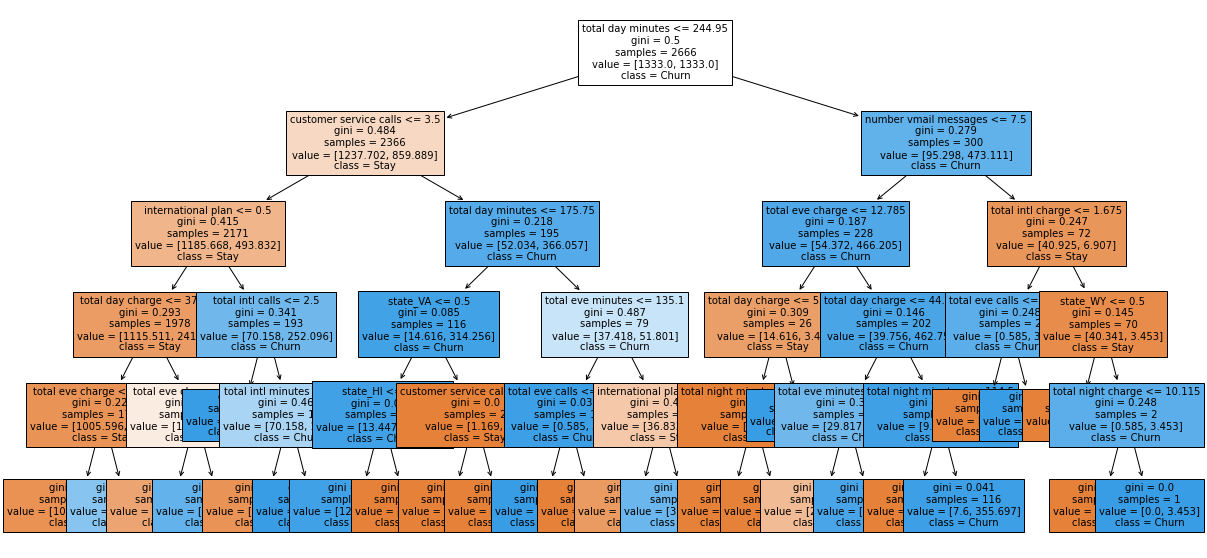

In [230]:
plt.figure(figsize=(20,10))
plot_tree(
    tree, 
    feature_names=X.columns, 
    class_names=['Stay','Churn'], 
    filled=True,
    fontsize=10
)
plt.show()
